In [1]:
import sys
sys.path.append("../../../ssl")

In [2]:
import numpy as np
from utils import plot_history
from utils.eval import hyperparam_grid_finetune
import torchvision.transforms as Transforms
from augmentations.utils import MinMaxScaling
from utils import set_seed

In [3]:
set_seed(12)

In [4]:
ckpt_path = "./expt13_models/epoch_800_accknn_85.979730_checkpoint.pth"

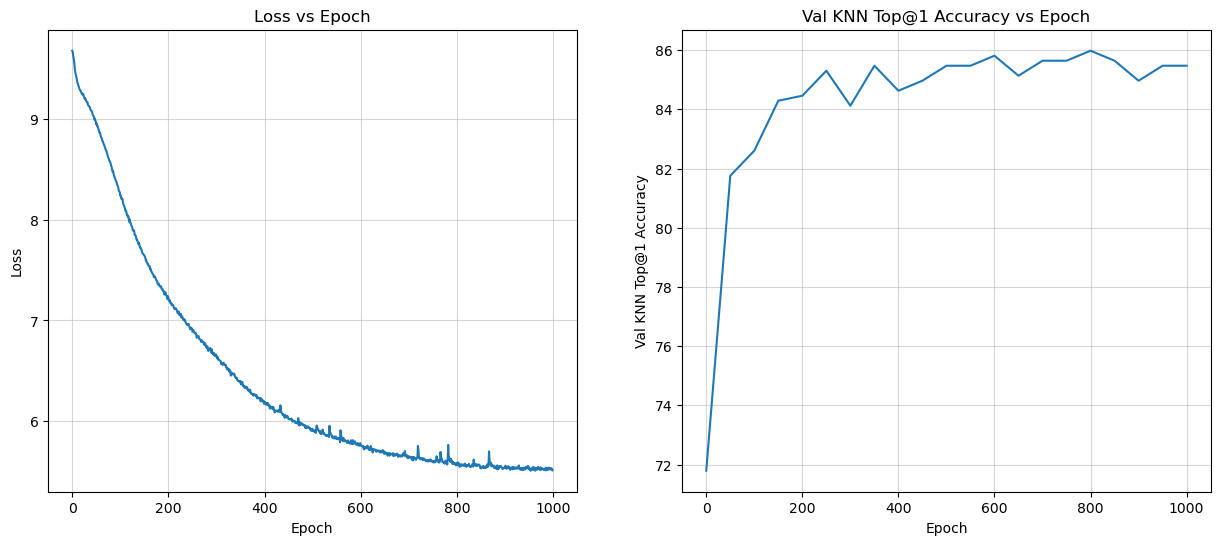

<Figure size 640x480 with 0 Axes>

In [5]:
plot_history(ckpt_path, plt_save_path="./train_history.png")

In [5]:
eval_transforms = Transforms.Compose([
                                Transforms.CenterCrop(64),
                                MinMaxScaling(),
                                Transforms.Normalize([0.5107012987136841, 0.530750572681427, 0.5519816279411316],
                                                     [0.022646993398666382, 0.059592872858047485, 0.08994007110595703]),
                            ])
data_path = "../../../input/real_lenses_dataset"

lr = [1e-4, 1e-5, 1e-6, 1e-7]
weight_decay = [0, 5e-4, 5e-5]
momentum = [0.9]
num_epochs = [20, 50, 100]

best_params = hyperparam_grid_finetune(
                ckpt_path=ckpt_path,
                eval_transforms = eval_transforms,
                embed_dim = 384,
                num_epochs = num_epochs,
                lr = lr,
                momentum = momentum,
                weight_decay = weight_decay,
                data_path = data_path,
            )

Iter 1
lr: 0.0001, momentum: 0.9, weight_decay: 0.0, num_epochs: 20

[0/20] Train Loss: 0.3945, Val Loss: 0.2975, Val Accuracy: 86.82%

[1/20] Train Loss: 0.2952, Val Loss: 0.3116, Val Accuracy: 89.70%

[2/20] Train Loss: 0.2952, Val Loss: 0.3116, Val Accuracy: 89.70%

[3/20] Train Loss: 0.2952, Val Loss: 0.3116, Val Accuracy: 89.70%

[4/20] Train Loss: 0.2952, Val Loss: 0.3116, Val Accuracy: 89.70%

[5/20] Train Loss: 0.2952, Val Loss: 0.3116, Val Accuracy: 89.70%

[6/20] Train Loss: 0.1837, Val Loss: 0.2904, Val Accuracy: 90.20%

[7/20] Train Loss: 0.1580, Val Loss: 0.2289, Val Accuracy: 90.54%

[8/20] Train Loss: 0.1373, Val Loss: 0.2589, Val Accuracy: 90.71%

[9/20] Train Loss: 0.1373, Val Loss: 0.2589, Val Accuracy: 90.71%

[10/20] Train Loss: 0.1093, Val Loss: 0.2990, Val Accuracy: 91.05%

[11/20] Train Loss: 0.0732, Val Loss: 0.3254, Val Accuracy: 91.55%

[12/20] Train Loss: 0.0732, Val Loss: 0.3254, Val Accuracy: 91.55%

[13/20] Train Loss: 0.0732, Val Loss: 0.3254, Val Accurac

KeyboardInterrupt: 

In [7]:
eval_transforms = Transforms.Compose([
                                Transforms.CenterCrop(64),
                                MinMaxScaling(),
                                Transforms.Normalize([0.5107012987136841, 0.530750572681427, 0.5519816279411316],
                                                     [0.022646993398666382, 0.059592872858047485, 0.08994007110595703]),
                            ])
data_path = "../../../input/real_lenses_dataset"

lr = [1e-5]
weight_decay = [0]
momentum = [0.9]
num_epochs = [20]

best_params = hyperparam_grid_finetune(
                ckpt_path=ckpt_path,
                eval_transforms = eval_transforms,
                embed_dim = 384,
                num_epochs = num_epochs,
                lr = lr,
                momentum = momentum,
                weight_decay = weight_decay,
                data_path = data_path,
            )

Iter 1
lr: 1e-05, momentum: 0.9, weight_decay: 0.0, num_epochs: 20

[0/20] Train Loss: 0.4628, Val Loss: 0.3380, Val Accuracy: 86.15%

[1/20] Train Loss: 0.3311, Val Loss: 0.3005, Val Accuracy: 88.68%

[2/20] Train Loss: 0.2820, Val Loss: 0.2723, Val Accuracy: 90.03%

[3/20] Train Loss: 0.2820, Val Loss: 0.2723, Val Accuracy: 90.03%

[4/20] Train Loss: 0.2820, Val Loss: 0.2723, Val Accuracy: 90.03%

[5/20] Train Loss: 0.2820, Val Loss: 0.2723, Val Accuracy: 90.03%

[6/20] Train Loss: 0.2820, Val Loss: 0.2723, Val Accuracy: 90.03%

[7/20] Train Loss: 0.2820, Val Loss: 0.2723, Val Accuracy: 90.03%

[8/20] Train Loss: 0.1480, Val Loss: 0.2378, Val Accuracy: 91.05%

[9/20] Train Loss: 0.1480, Val Loss: 0.2378, Val Accuracy: 91.05%

[10/20] Train Loss: 0.1480, Val Loss: 0.2378, Val Accuracy: 91.05%

[11/20] Train Loss: 0.1480, Val Loss: 0.2378, Val Accuracy: 91.05%

[12/20] Train Loss: 0.1480, Val Loss: 0.2378, Val Accuracy: 91.05%

[13/20] Train Loss: 0.1480, Val Loss: 0.2378, Val Accuracy

In [9]:
# class MinMaxScaling:
#     def __init__(
#             self,
#             min_clamp = -3.,
#             max_clamp = 3.,
#         ):
#         self.min_clamp = min_clamp
#         self.max_clamp = max_clamp
        
#     def __call__(self, img):
#         img = torch.clamp(img, min=self.min_clamp, max=self.max_clamp)
#         C, H, W = img.shape 

#         max = torch.full_like(img, self.max_clamp)
#         # c = torch.reshape(img, (C, -1)).max(-1).values
#         # for i in range(C):
#         #     max[i] = c[i]
        
#         min = torch.full_like(img, self.min_clamp)
#         # c = torch.reshape(img, (C, -1)).min(-1).values
#         # for i in range(C):
#         #     min[i] = c[i]
        
#         x = max - min
#         # x = x + torch.full_like(x, 1e-8)
#         return (img - min) / x
#         # return img

In [18]:
import torch
import copy
import torch.nn as nn
import torch.optim as optim
from models.MLP import MLP
from utils.eval import train
from utils.eval import test_model

set_seed(12)

state = torch.load(ckpt_path, map_location="cpu")
model = MLP(
    copy.deepcopy(state["student"].backbone),
    embed_dim = 384,
    output_dim = 1,
    freeze_backbone = False,
)
torch.nn.init.xavier_uniform_(model.fc.weight)
model.fc.bias.data.fill_(0.01)

model = model.cuda()
model.train()

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4,weight_decay=0)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20, eta_min=0)

eval_transforms = Transforms.Compose([
                                Transforms.CenterCrop(64),
                                MinMaxScaling(),
                                Transforms.Normalize([0.5107012987136841, 0.530750572681427, 0.5519816279411316],
                                                     [0.022646993398666382, 0.059592872858047485, 0.08994007110595703]),
                            ])
data_path = "../../../input/real_lenses_dataset"

model = train(
        model,
        ckpt_path,
        eval_transforms,
        20, 
        optimizer, 
        scheduler,
        criterion,
        data_path,
        batch_size=32
    )
test_model(model, ckpt_path, eval_transforms, criterion, data_path)

[1/20] Train Loss: 0.3945, Val Loss: 0.2975, Val Accuracy: 86.82%

[2/20] Train Loss: 0.2952, Val Loss: 0.3116, Val Accuracy: 89.70%

[3/20] Train Loss: 0.2952, Val Loss: 0.3116, Val Accuracy: 89.70%

[4/20] Train Loss: 0.2952, Val Loss: 0.3116, Val Accuracy: 89.70%

[5/20] Train Loss: 0.2952, Val Loss: 0.3116, Val Accuracy: 89.70%

[6/20] Train Loss: 0.2952, Val Loss: 0.3116, Val Accuracy: 89.70%

[7/20] Train Loss: 0.1837, Val Loss: 0.2904, Val Accuracy: 90.20%

[8/20] Train Loss: 0.1580, Val Loss: 0.2289, Val Accuracy: 90.54%

[9/20] Train Loss: 0.1373, Val Loss: 0.2589, Val Accuracy: 90.71%

[10/20] Train Loss: 0.1373, Val Loss: 0.2589, Val Accuracy: 90.71%

[11/20] Train Loss: 0.1093, Val Loss: 0.2990, Val Accuracy: 91.05%

[12/20] Train Loss: 0.0732, Val Loss: 0.3254, Val Accuracy: 91.55%

[13/20] Train Loss: 0.0732, Val Loss: 0.3254, Val Accuracy: 91.55%

[14/20] Train Loss: 0.0732, Val Loss: 0.3254, Val Accuracy: 91.55%

[15/20] Train Loss: 0.0732, Val Loss: 0.3254, Val Accurac

(tensor(0.0067, device='cuda:0', grad_fn=<DivBackward0>), 90.55649241146712)

In [19]:
torch.save(model, "./ViT_S_16_classification.pth")

In [21]:
from torchvision import datasets
from torch.utils.data import DataLoader

data_path = "../../../input/real_lenses_dataset"
state = torch.load(ckpt_path, map_location="cpu")

def npy_loader(path):
    sample = torch.from_numpy(np.load(path))
    return sample
    
# regenerate the datasets
test_indices = state["history"]["test_indices"]


dataset = datasets.DatasetFolder(
        root=data_path,
        loader=npy_loader,
        extensions=['.npy'],
        transform=eval_transforms
    )
dataset.samples = [dataset.samples[i] for i in test_indices.indices]

In [26]:
wrongs = []

for i in range(len(dataset)):
    with torch.no_grad():
        x = dataset[i][0]
        C, H, W = x.shape
        x = x.reshape(1, C, H, W).cuda()
        y = model(x)
        y = (y.cpu().numpy().ravel() > 0).astype(np.float16)
        label = float(dataset[i][1])
        if y != label:
            wrongs.append(dataset[i][0])        
    

tensor(4.9813)

In [ ]:
model.freeze_backbone = False
model.backbone.requires_grad = True

model.train()

model = model.cuda()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2, weight_decay=5e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, eta_min=0)

eval_transforms = Transforms.Compose([
                                Transforms.CenterCrop(64),
                                MinMaxScaling(),
                                Transforms.Normalize([0.5107012987136841, 0.530750572681427, 0.5519816279411316],
                                                     [0.022646993398666382, 0.059592872858047485, 0.08994007110595703]),
                            ])
data_path = "../../../input/real_lenses_dataset"

model = train(
        model,
        ckpt_path,
        eval_transforms,
        40, 
        optimizer, 
        scheduler,
        criterion,
        data_path,
    )

test_model(model, ckpt_path, eval_transforms, criterion, data_path)